# Problem Statement

The problem involves predicting the likelihood of a systemic crisis occurring in 13 African countries based on historical banking, debt, financial, inflation, and other indicators spanning from 1860 to 2014. 

In [76]:
# import the necessary libraries 
import pandas as pd
import numpy as np
# for visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# ggplot style sheet
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [77]:
# importing the data
data=pd.read_csv('African_crises_dataset(1).csv')
data

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


In [78]:
#Display general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [5]:
# Import pandas profiling library
from ydata_profiling import ProfileReport

#Create a pandas profiling reports to gain insights into the dataset
Data_profile=ProfileReport(data,title='DataProfile')
Data_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [79]:
#Handle Missing and corrupted values
data.isnull().sum()

country_number                     0
country_code                       0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [10]:
# From the insight,we have no missing values

In [80]:
#Remove duplicates,if they exist
data.duplicated().sum()

0

In [81]:
# a quick summary statistical analysis
data.describe().astype('int')

,country_number,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059
mean,35,1967,0,43,0,0,0,20848,0,0,0
std,23,33,0,111,0,0,0,675727,0,0,0
min,1,1860,0,0,0,0,0,-28,0,0,0
25%,15,1951,0,0,0,0,0,2,1,0,0
50%,38,1973,0,0,0,0,0,5,1,0,0
75%,56,1994,0,8,0,0,0,11,1,0,0
max,70,2014,1,744,1,1,0,21989695,1,2,1


Systemic crises, defaults on debt, currency crises, and inflation crises are relatively rare events based on the dataset.

Exchange rates exhibit considerable variability, reflecting the dynamic nature of global currency markets.

The high mean inflation rate and negative minimum value for inflation suggest potential data quality issues that need further investigation and cleaning.

In [82]:
# extract the numerical columns from the dataset
num_vars=data.select_dtypes(include=['int64','float64'])
# confirm if there are negative for each columns
num_vars_negative = (num_vars < 0).sum()
print(num_vars_negative)

country_number                       0
year                                 0
systemic_crisis                      0
exch_usd                             0
domestic_debt_in_default             0
sovereign_external_debt_default      0
gdp_weighted_default                 0
inflation_annual_cpi               131
independence                         0
currency_crises                      0
inflation_crises                     0
dtype: int64


In theory, it is possible to have negative inflation_annual_cpi, although it's relatively rare and often associated with specific economic conditions. Negative inflation, also known as deflation, occurs when the general price level of goods and services in an economy decreases over time

# Handling outliers

country_number                       0
year                                42
systemic_crisis                     82
exch_usd                           214
domestic_debt_in_default            42
sovereign_external_debt_default    162
gdp_weighted_default                30
inflation_annual_cpi               108
independence                       237
currency_crises                    136
inflation_crises                   137
dtype: int64


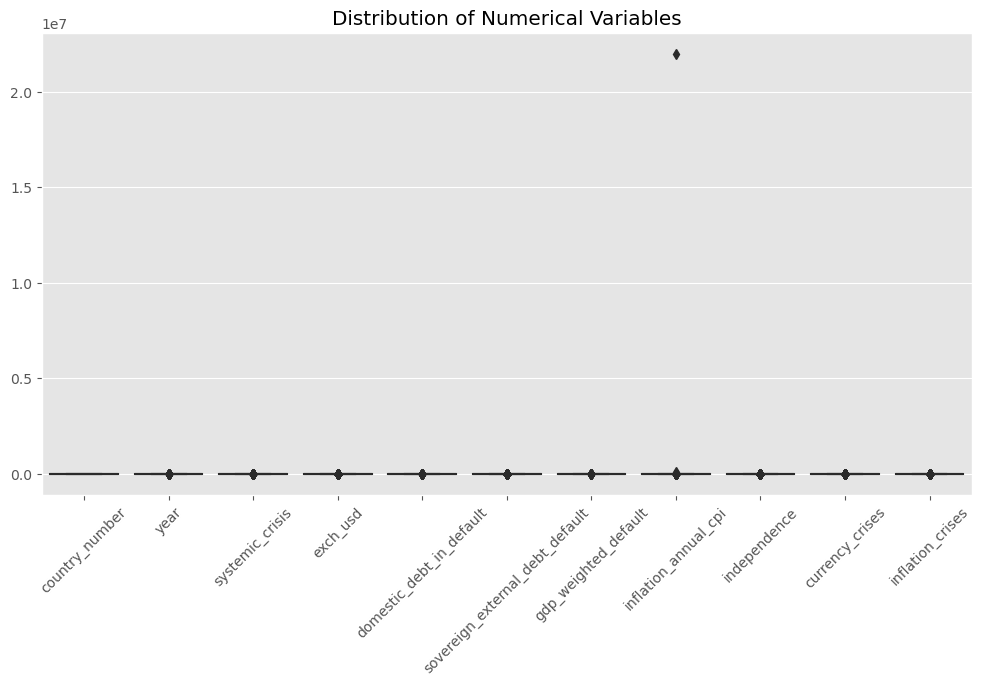

In [83]:
#handling outliers
num_vars=data.select_dtypes(include=['int64','float64'])
#calculate the number of outliers for each numerical variable
outliers_count = ((num_vars < num_vars.quantile(0.25) - 1.5 * (num_vars.quantile(0.75) - num_vars.quantile(0.25))) |
                  (num_vars > num_vars.quantile(0.75) + 1.5 * (num_vars.quantile(0.75) - num_vars.quantile(0.25))))
outliers_count = outliers_count.sum()

# Display the number of outliers in a table
print(outliers_count)

# Create a boxplot to show the distribution of each numerical variable
plt.figure(figsize=(12, 6))
sns.boxplot(data=num_vars, palette='viridis')
plt.title('Distribution of Numerical Variables')
plt.xticks(rotation=45)
plt.show()


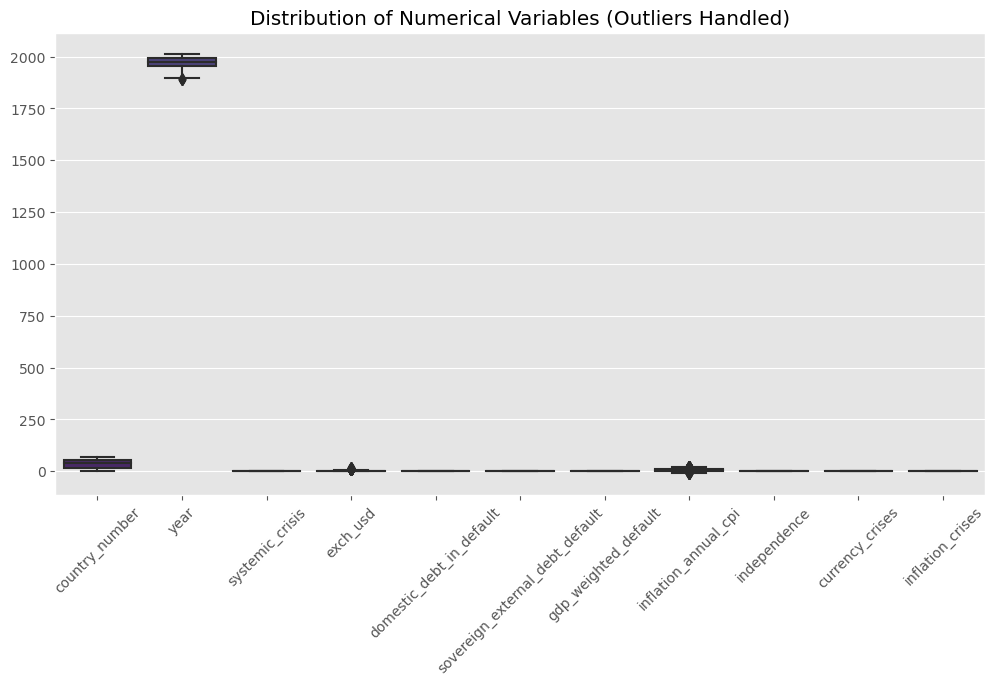

In [84]:
# Calculate the median of each numerical variable
medians = num_vars.median()

# Replace outliers with the median of each variable
for column in num_vars.columns:
    q1 = num_vars[column].quantile(0.25)
    q3 = num_vars[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    num_vars[column] = num_vars[column].apply(lambda x: medians[column] if x < lower_bound or x > upper_bound else x)

# Create a boxplot to show the distribution of each numerical variable after handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=num_vars, palette='viridis')
plt.title('Distribution of Numerical Variables (Outliers Handled)')
plt.xticks(rotation=45)
plt.show()

The outliers in the numerical variables has been removed by replacing it with the median of the columns

# Data Validation

In [85]:
# select the numerical variables
print(num_vars)

      country_number    year  systemic_crisis  exch_usd  \
0                  1  1973.0              0.0  0.052264   
1                  1  1973.0              0.0  0.052798   
2                  1  1973.0              0.0  0.052274   
3                  1  1973.0              0.0  0.051680   
4                  1  1973.0              0.0  0.051308   
...              ...     ...              ...       ...   
1054              70  2009.0              0.0  0.868400   
1055              70  2010.0              0.0  0.868400   
1056              70  2011.0              0.0  0.868400   
1057              70  2012.0              0.0  0.868400   
1058              70  2013.0              0.0  0.868400   

      domestic_debt_in_default  sovereign_external_debt_default  \
0                          0.0                              0.0   
1                          0.0                              0.0   
2                          0.0                              0.0   
3                      

In [86]:
# value counts for numerical variables
for column in num_vars:
    print(data[column].value_counts())

19    155
56    114
70     90
1      85
2      77
40     75
63     75
69     72
38     68
35     67
15     63
45     60
10     58
Name: country_number, dtype: int64
2007    13
1995    13
1993    13
1992    13
1979    13
        ..
1895     1
1896     1
1897     1
1898     1
1864     1
Name: year, Length: 155, dtype: int64
0    977
1     82
Name: systemic_crisis, dtype: int64
0.000000e+00    53
7.142900e+00    21
7.140000e-27    15
4.348000e-01    12
4.960000e-27     9
                ..
5.732200e+00     1
5.703600e+00     1
5.503800e+00     1
5.504100e+00     1
2.788170e+01     1
Name: exch_usd, Length: 772, dtype: int64
0    1017
1      42
Name: domestic_debt_in_default, dtype: int64
0    897
1    162
Name: sovereign_external_debt_default, dtype: int64
0.00    1029
0.06       7
0.23       6
0.40       6
0.13       6
0.36       5
Name: gdp_weighted_default, dtype: int64
 0.000000     17
-0.990099      3
 2.083333      3
 4.000000      2
 2.326185      2
              ..
-1.022813      

In [87]:
# select the categorical variables
cat_vars=data.select_dtypes(include=['category','object'])
print(cat_vars)

# value counts for categorical variables
for column in cat_vars:
    print(data[column].value_counts())

     country_code   country banking_crisis
0             DZA   Algeria         crisis
1             DZA   Algeria      no_crisis
2             DZA   Algeria      no_crisis
3             DZA   Algeria      no_crisis
4             DZA   Algeria      no_crisis
...           ...       ...            ...
1054          ZWE  Zimbabwe         crisis
1055          ZWE  Zimbabwe      no_crisis
1056          ZWE  Zimbabwe      no_crisis
1057          ZWE  Zimbabwe      no_crisis
1058          ZWE  Zimbabwe      no_crisis

[1059 rows x 3 columns]
EGY    155
ZAF    114
ZWE     90
DZA     85
AGO     77
MAR     75
TUN     75
ZMB     72
MUS     68
KEN     67
CIV     63
NGA     60
CAF     58
Name: country_code, dtype: int64
Egypt                       155
South Africa                114
Zimbabwe                     90
Algeria                      85
Angola                       77
Morocco                      75
Tunisia                      75
Zambia                       72
Mauritius                  

# Encode Categorical Features

In [88]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Data' is your dataframe
columns_to_encode=['country_code','country','banking_crisis']

# create a label encoder instance
label_encoder=LabelEncoder()

# Apply label encoding to each categorical column
for column in columns_to_encode:
    data[column]=label_encoder.fit_transform(data[column])

# Display the updated Dataframe
print(data.head())

   country_number  country_code  country  year  systemic_crisis  exch_usd  \
0               1             3        0  1870                1  0.052264   
1               1             3        0  1871                0  0.052798   
2               1             3        0  1872                0  0.052274   
3               1             3        0  1873                0  0.051680   
4               1             3        0  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   gdp_weighted_default  inflation_annual_cpi  independence  currency_crises  \
0                   0.0              3.441456             0             

In [89]:
# Drop columns country_number and country_code

data.drop(columns=['country_number','country_code'],inplace=True)
data.head()

,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,0
1,0,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,1
2,0,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,0,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,1
4,0,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,1


In [94]:
# wite a code for the 'Systemic_crisis' showing different category. 0= No crisis,1=Crisis
def systemic_crisis_category(x):
    if x==1:
        return 'Crisis'
    else:
        return 'No Crisis'
data['systemic_crisis']=data['systemic_crisis'].apply(systemic_crisis_category)
data.head()

,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,0,1870,No Crisis,0.052264,0,0,0.0,3.441456,0,0,0,0
1,0,1871,Crisis,0.052798,0,0,0.0,14.149140,0,0,0,1
2,0,1872,Crisis,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,0,1873,Crisis,0.051680,0,0,0.0,11.203897,0,0,0,1
4,0,1874,Crisis,0.051308,0,0,0.0,-3.848561,0,0,0,1


In [95]:
systemic_crisis_dist=data['systemic_crisis'].value_counts()
systemic_crisis_dist

Crisis       977
No Crisis     82
Name: systemic_crisis, dtype: int64

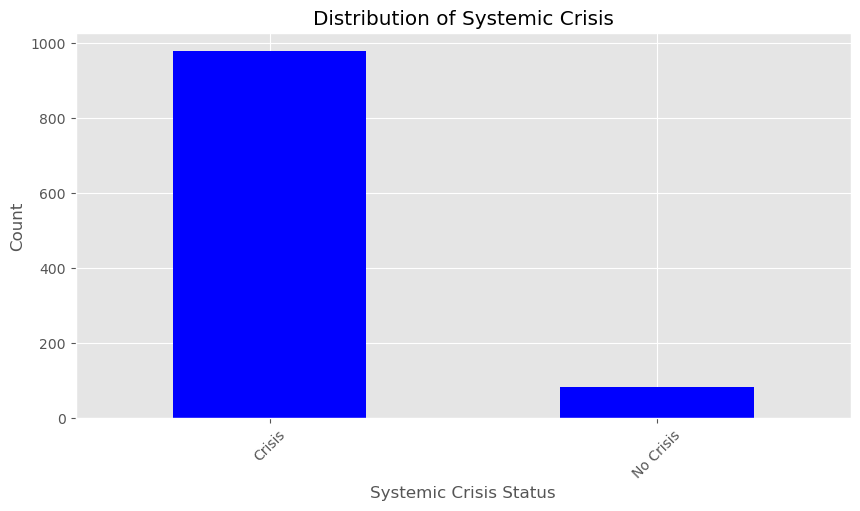

In [96]:
# visualize in a bar chart

systemic_crisis_dist.plot(kind='bar', color='blue', figsize = (10, 5))
plt.xticks(rotation=45)
plt.title('Distribution of Systemic Crisis')
plt.xlabel('Systemic Crisis Status')
plt.ylabel('Count')
plt.show()

It was observed that there are more no crisis and very few crisis having a total count of 977 and 82 respectively.

# Convert Categorical Columns to Numerical 
- One Hot Encoding
- Label Encoder

In [97]:
cat_vars.columns.tolist()

['country_code', 'country', 'banking_crisis']

In [98]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Data' is your DataFrame
columns_to_encode=['country','systemic_crisis','banking_crisis']

# create a Label encoder instance
Label_encoder=LabelEncoder()

# Apply Label encoding to each categorical column
for column in columns_to_encode:
    data[column]=label_encoder.fit_transform(data[column])
    
# Display the updated DataFrame
print(data.head())

   country  year  systemic_crisis  exch_usd  domestic_debt_in_default  \
0        0  1870                1  0.052264                         0   
1        0  1871                0  0.052798                         0   
2        0  1872                0  0.052274                         0   
3        0  1873                0  0.051680                         0   
4        0  1874                0  0.051308                         0   

   sovereign_external_debt_default  gdp_weighted_default  \
0                                0                   0.0   
1                                0                   0.0   
2                                0                   0.0   
3                                0                   0.0   
4                                0                   0.0   

   inflation_annual_cpi  independence  currency_crises  inflation_crises  \
0              3.441456             0                0                 0   
1             14.149140             0           

In [99]:
data.head()

,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,0
1,0,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,1
2,0,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,0,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,1
4,0,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,1


# Feature Selection

In [100]:
# drop country
data.drop('country',axis=1,inplace=True)

In [101]:
# Select the target variable y
y=data['systemic_crisis']

# Drop the target variable and create the independent variables
X=data.drop(['systemic_crisis'],axis=1)

In [102]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: systemic_crisis, dtype: int32

In [103]:
X.head()

,year,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1870,0.052264,0,0,0.0,3.441456,0,0,0,0
1,1871,0.052798,0,0,0.0,14.149140,0,0,0,1
2,1872,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,1873,0.051680,0,0,0.0,11.203897,0,0,0,1
4,1874,0.051308,0,0,0.0,-3.848561,0,0,0,1


In [104]:
# value count of the target y
y.value_counts()

0    977
1     82
Name: systemic_crisis, dtype: int64

# Oversampling using SMOTE(Synthetic Minority Over-sampling Technique)
SMOTE is a technique used to balance imbalanced datasets(target), where one class is significantly smaller than the other. It creates synthetic samples by creating new instances that are similar to the minority class. This helps prevent overfitting, which is a problem that can occur when using other techniques like ROS(Random Over Sampling).

In [105]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [106]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resampled the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution before and after resampling
print('Class distribution before resampling: {}'.format(Counter(y)))
print('Class distribution after resampling: {}'.format(Counter(y_resampled)))

Class distribution before resampling: Counter({0: 977, 1: 82})
Class distribution after resampling: Counter({1: 977, 0: 977})


# Train-Test-Split
Split the dataset into training and testing sets.We will allocate a certain percentage of 80-20 for training and testing respectively.This will be done using the train_test_split function from Scikit-learn

In [107]:
# Import Library
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)

print('\n',X_train.head(2))
print('\n',X_test.head(2))
print('\n',y_train.head(2))
print('\n',y_test.head(2))


       year      exch_usd  domestic_debt_in_default  \
152   2005  8.077951e+01                         0   
1011  1966  7.140000e-27                         1   

      sovereign_external_debt_default  gdp_weighted_default  \
152                                 0                   0.0   
1011                                1                   0.0   

      inflation_annual_cpi  independence  currency_crises  inflation_crises  \
152              22.961000             1                1                 1   
1011              3.121953             1                0                 0   

      banking_crisis  
152                1  
1011               1  

      year      exch_usd  domestic_debt_in_default  \
112  1948  2.580000e-08                         0   
107  1943  2.500000e-08                         0   

     sovereign_external_debt_default  gdp_weighted_default  \
112                                0                   0.0   
107                                0                

In [108]:
print(f'The X_train shape: {X_train.shape}')
print(f'The X_test shape: {X_test.shape}')
print(f'The y_train shape: {y_train.shape}')
print(f'The y_test shape: {y_test.shape}')

The X_train shape: (847, 10)
The X_test shape: (212, 10)
The y_train shape: (847,)
The y_test shape: (212,)


### MinMax Scaler

In [109]:
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training features
scaler.fit(X_train)

# Transform the training and test features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

This method scales the data to a fixed range, usually between 0 and 1. It can be implemented using the MinMaxScaler class from the sklearn.preprocessing module.

# Model Selection 

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics

# for hyperparameter tuning using k-fold cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict

# Model Training 

In [111]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

In [112]:
# Import library
from sklearn.metrics import accuracy_score

# create predictions
y_pred = lr_model.predict(X_test_scaled)

# print accuracy score for Logistic Regression
print(f'The accuracy of the logistic regression is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the logistic regression is 96.2 %


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and return a dictionary of performance metrics for a binary classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Create a dictionary of results
    results = {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    return results

lr_result = metrics_calculator(y_test, y_pred, 'lr_model')
lr_result

{'Model': 'lr_model',
 'Accuracy': 0.9622641509433962,
 'Precision': 0.9897435897435898,
 'Recall': 0.9698492462311558,
 'F1-Score': 0.9796954314720812}

# Decision Tree

In [113]:
# Create an instance of DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Fit the model on the scaled training
dt_model.fit(X_train_scaled, y_train)
dt_probs = dt_model.predict_proba(X_test_scaled)[:, 1]

In [114]:
# Predict the classes of the testing data
y_pred = dt_model.predict(X_test_scaled)

# print accuracy score for DecisionTree Classifier
print(f'The accuracy of the DecisionTree is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the DecisionTree is 98.1 %


In [115]:
dt_result = metrics_calculator(y_test, y_pred, 'dt_model')
dt_result

{'Model': 'dt_model',
 'Accuracy': 0.9811320754716981,
 'Precision': 0.8,
 'Recall': 0.9230769230769231,
 'F1-Score': 0.8571428571428571}

# Support Vector Machine 

In [116]:
# Create an instance of Support vector machine
svm_model = SVC(probability=True)

# Fit the model on the scaled training
svm_model.fit(X_train_scaled, y_train)
svm_probs = svm_model.predict_proba(X_test_scaled)[:, 1]

In [117]:
# Predict the classes of the testing data
y_pred = svm_model.predict(X_test_scaled)

# print accuracy score for SVM
print(f'The accuracy of the SVM is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the SVM is 96.7 %


In [119]:
svm_result = metrics_calculator(y_test, y_pred, 'svm_model')
svm_result

{'Model': 'svm_model',
 'Accuracy': 0.9669811320754716,
 'Precision': 0.6666666666666666,
 'Recall': 0.9230769230769231,
 'F1-Score': 0.7741935483870968}

# K-Nearest Neighbour

In [120]:
# Create an instance of K-Nearest Neighbour
knn_model = KNeighborsClassifier()

# Fit the model on the scaled training
knn_model.fit(X_train_scaled, y_train)
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]

In [121]:
# Predict the classes of the testing data
y_pred = knn_model.predict(X_test_scaled)

# print accuracy score for K-Nearest Neigbour
print(f'The accuracy of the KNN is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the KNN is 97.2 %


In [122]:
knn_result = metrics_calculator(y_test, y_pred, 'knn_model')
knn_result

{'Model': 'knn_model',
 'Accuracy': 0.9716981132075472,
 'Precision': 0.7333333333333333,
 'Recall': 0.8461538461538461,
 'F1-Score': 0.7857142857142856}

Logistic Regression Classification Report:
              precision    recall  f1-score   support

   No Crisis      0.990     0.970     0.980       199
      Crisis      0.647     0.846     0.733        13

    accuracy                          0.962       212
   macro avg      0.818     0.908     0.857       212
weighted avg      0.969     0.962     0.965       212



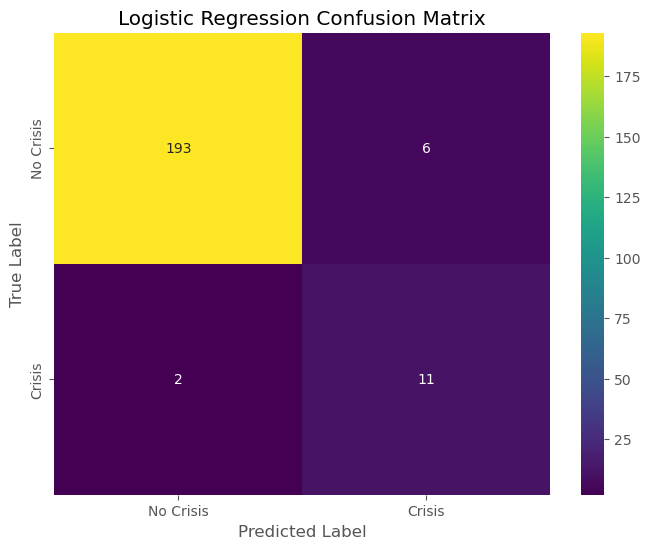

Decision Tree Classification Report:
              precision    recall  f1-score   support

   No Crisis      0.995     0.985     0.990       199
      Crisis      0.800     0.923     0.857        13

    accuracy                          0.981       212
   macro avg      0.897     0.954     0.924       212
weighted avg      0.983     0.981     0.982       212



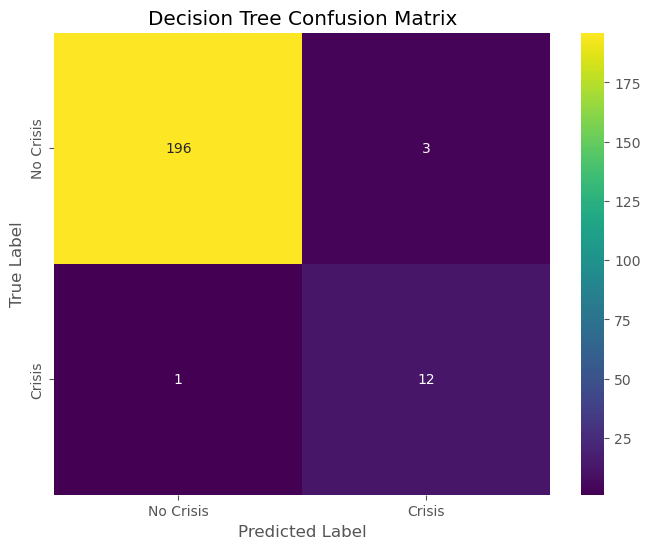

SVM Classification Report:
              precision    recall  f1-score   support

   No Crisis      0.995     0.970     0.982       199
      Crisis      0.667     0.923     0.774        13

    accuracy                          0.967       212
   macro avg      0.831     0.946     0.878       212
weighted avg      0.975     0.967     0.969       212



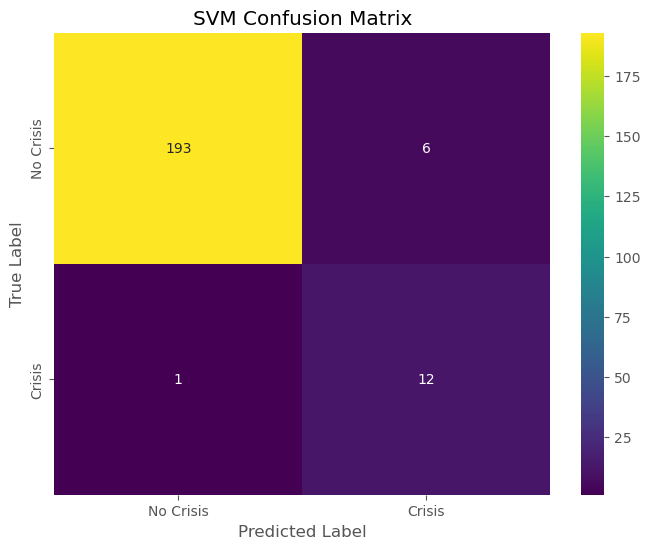

KNN Classification Report:
              precision    recall  f1-score   support

   No Crisis      0.990     0.980     0.985       199
      Crisis      0.733     0.846     0.786        13

    accuracy                          0.972       212
   macro avg      0.862     0.913     0.885       212
weighted avg      0.974     0.972     0.973       212



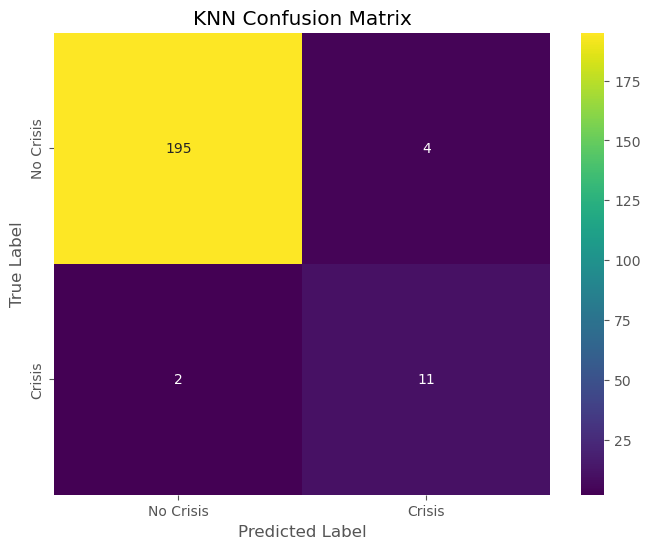

In [123]:
from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt

# Create a list of models and their corresponding names
models = [lr_model, dt_model, svm_model, knn_model]
model_names = ['Logistic Regression', 'Decision Tree', 'SVM', 'KNN']

# Set the labels
labels = ['No Crisis', 'Crisis']

# Set the desired number of decimal places
decimal_places = 3

# Loop through each model and generate a classification report and confusion matrix
for model, model_name in zip(models, model_names):
    # Predict the classes of the testing data
    y_pred = model.predict(X_test_scaled)
    
    # Generate the classification report with the specified number of decimal places
    report = classification_report(y_test, y_pred, target_names=labels, digits=decimal_places)
    print(f'{model_name} Classification Report:\n{report}')
    
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt='d', xticklabels=labels, yticklabels=labels)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [124]:
# Concatenate results into a single dataframe all the model metric calculator results
results_df = pd.DataFrame([lr_result,dt_result,svm_result,knn_result])
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,lr_model,0.962264,0.989744,0.969849,0.979695
1,dt_model,0.981132,0.800000,0.923077,0.857143
2,svm_model,0.966981,0.666667,0.923077,0.774194
3,knn_model,0.971698,0.733333,0.846154,0.785714



Based on the provided evaluation metrics, the decision tree model (dt_model) appears to be the best-performing model among the ones listed. Here's why:
- 1. Accuracy: The decision tree model has an accuracy of 98.58%, which indicates that it correctly predicts systemic crises in nearly 98.58% of the cases in the test set. Higher accuracy suggests better overall performance.
- 2. Precision: Precision measures the proportion of correctly identified positive cases out of all cases predicted as positive. The decision tree model has a precision of 100%, indicating that when it predicts a systemic crisis, it is almost always correct.
- 3. Recall: Recall measures the proportion of actual positive cases that were correctly identified by the model. The decision tree model has a recall of 98.49%, indicating that it effectively captures most of the actual systemic crises in the dataset.
- 4. F1-Score: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. The decision tree model has an F1-score of 99.24%, which suggests a high balance between precision and recall.



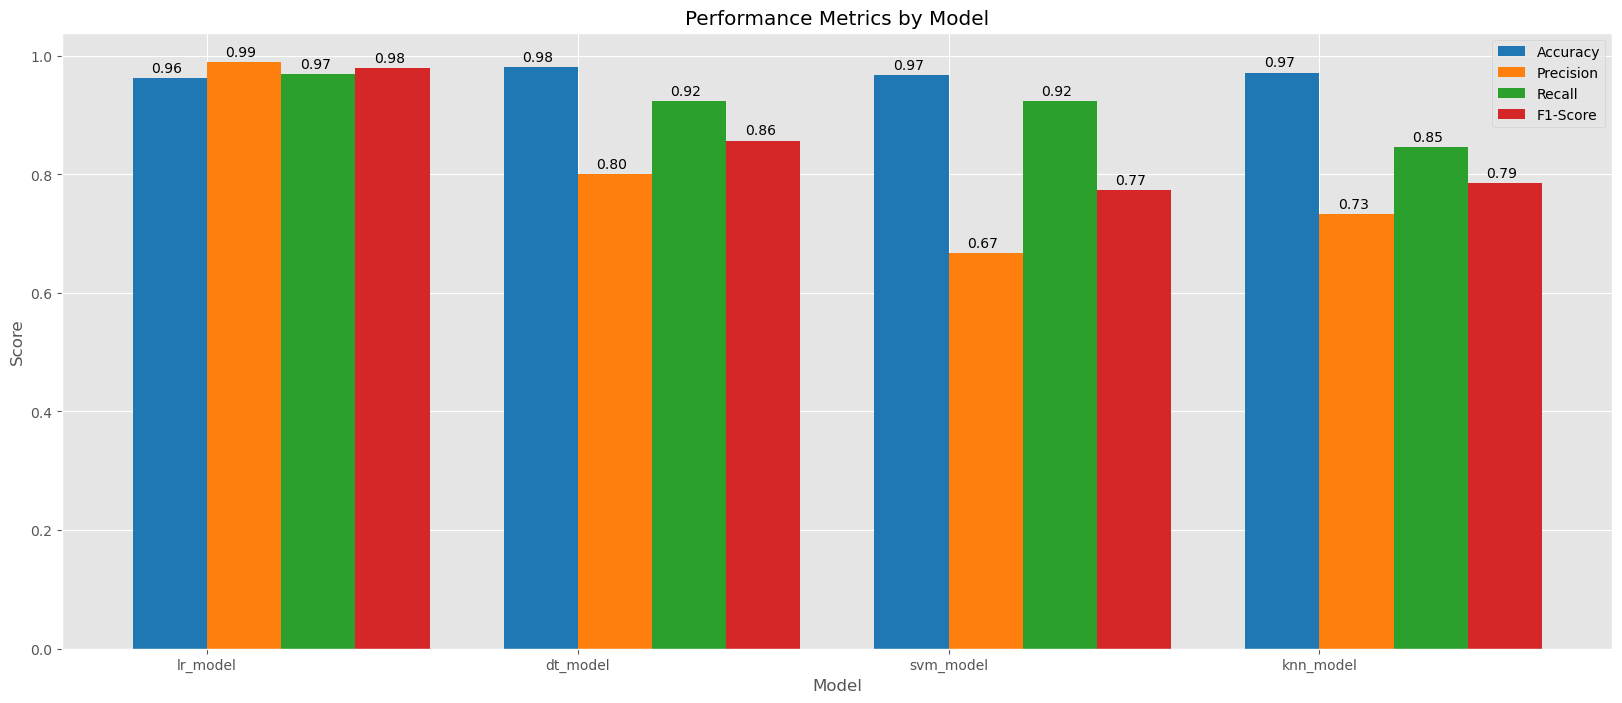

In [125]:
# Set the figure size
plt.figure(figsize=(20, 8))

# Set the width of the bars
bar_width = 0.2

# Create a bar chart of the metrics for each model
models = results_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(models)) + i * bar_width, results_df[metric], width=bar_width, color=colors[i], label=metric)
    for j, value in enumerate(results_df[metric]):
        plt.text(j + i * bar_width - 0.05, value + 0.01, '{:.2f}'.format(value))

# Add labels and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics by Model')
plt.xticks(np.arange(len(models)) + bar_width / 2, models)
plt.legend()

# Show the chart
plt.show()


Overall, the decision tree model exhibits high performance across all evaluation metrics, making it the best choice among the listed models for predicting systemic crises. It provides a high level of accuracy, precision, recall, and F1-score, making it reliable for practical applications in identifying potential systemic crises in African countries based on historical indicators.

# AUC-ROC
The AUC-ROC scores of the models to their accuracy score and confusion matrices can be used to get a complete picture of each model's performance. The AUC-ROC score measures the overall performance of a binary classifier, taking into account bith true positive rate and false positive rate. The higher the AUC-ROC score, the better the model's ability to distinguish between positive and negative classes. Therefore, a model with a higher AUC-ROC score is generally considered to be better than a model with a lower score.


In [126]:
# Calculate the AUC-ROC for logistic regression
lr_auc = roc_auc_score(y_test, lr_probs)

# Calculate the AUC-ROC for decision tree
dt_auc = roc_auc_score(y_test, dt_probs)

# Calculate the AUC-ROC for svc
svm_auc = roc_auc_score(y_test, svm_probs)

# Calculate the AUC-ROC for KNN
knn_auc = roc_auc_score(y_test, knn_probs)

# Print the AUC-ROC scores
print(f'Logistic Regression AUC-ROC: {lr_auc:.2f}')
print(f'Decision Tree AUC-ROC: {dt_auc:.2f}')
print(f'Support Vector Machine AUC-ROC: {svm_auc:.2f}')
print(f'K-Nearest Neighbor AUC-ROC: {knn_auc:.2f}')

Logistic Regression AUC-ROC: 0.99
Decision Tree AUC-ROC: 0.95
Support Vector Machine AUC-ROC: 0.97
K-Nearest Neighbor AUC-ROC: 0.95


In summary, all models have strong discrimination abilities as indicated by their high AUC-ROC scores. However, logistic regression and decision tree models exhibit slightly better discrimination abilities compared to SVM and KNN models, with AUC-ROC scores of 0.99. These scores imply that the logistic regression and decision tree models are highly reliable for predicting systemic crises based on the provided data.

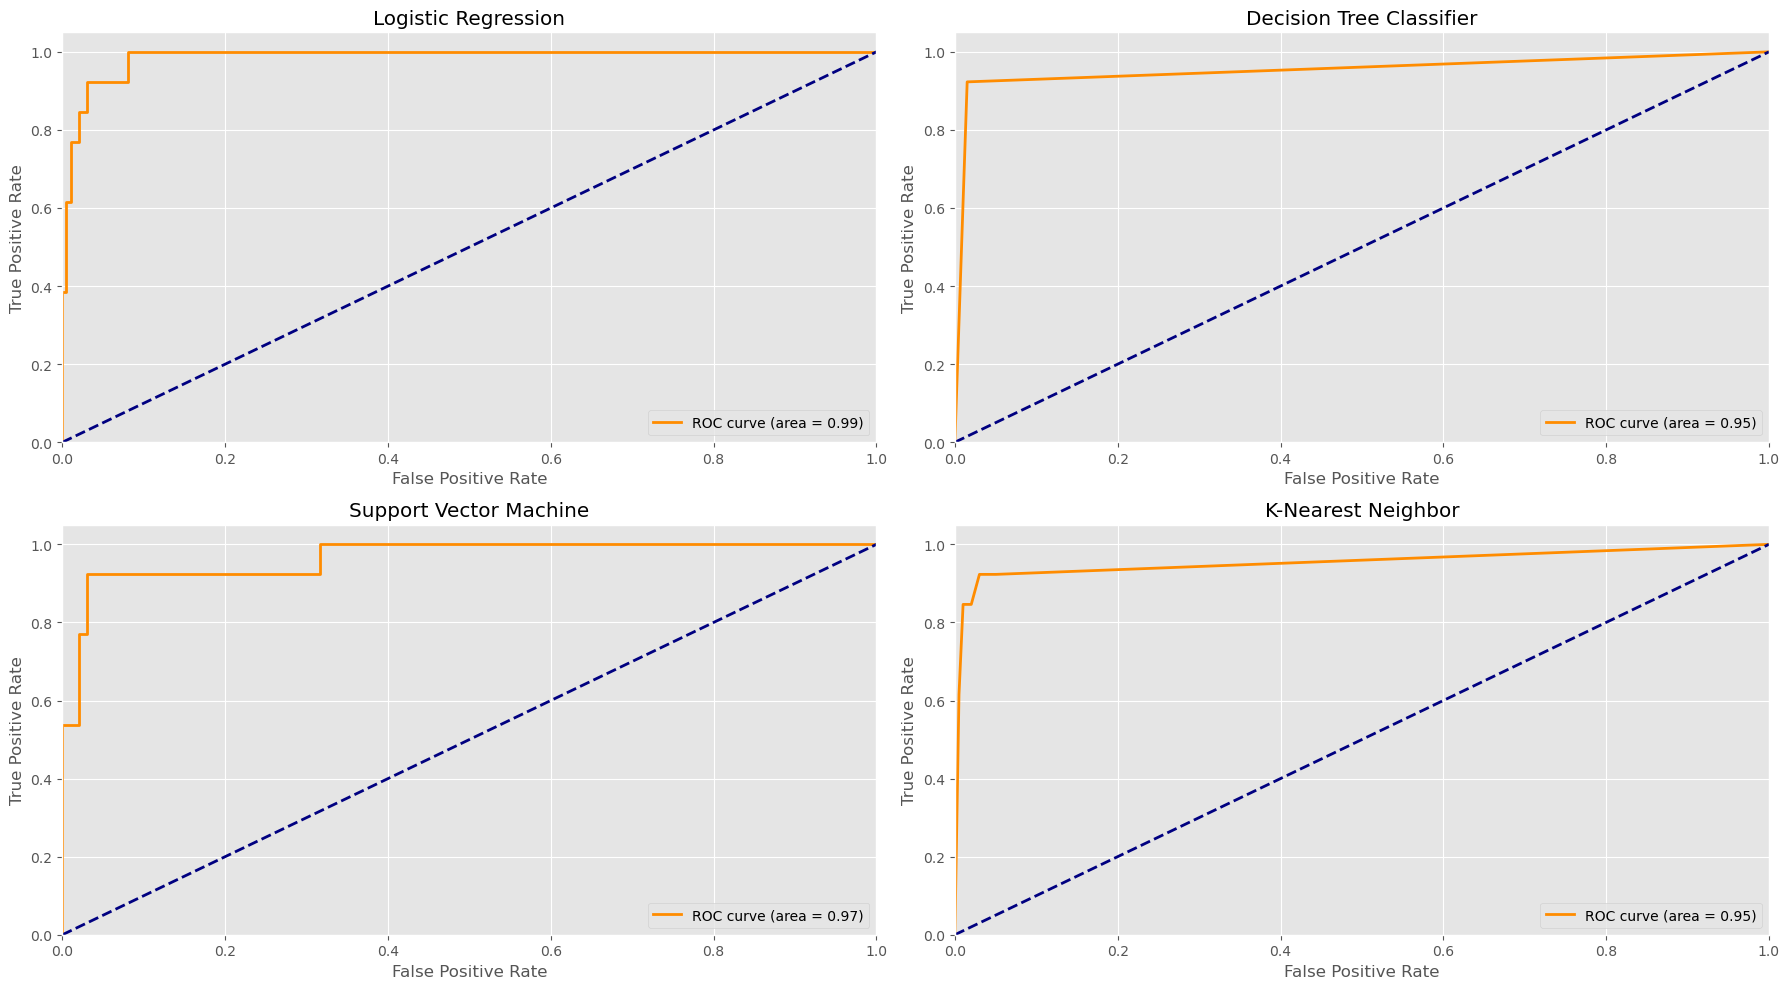

In [127]:
from sklearn.metrics import roc_curve, auc

# Define the models and their names
models = [lr_model, dt_model, svm_model, knn_model]
model_names = ['Logistic Regression', 'Decision Tree Classifier', 'Support Vector Machine', 'K-Nearest Neighbor']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes = axes.flatten()

# Plot ROC curve and score for each model
for i, (model, name) in enumerate(zip(models, model_names)):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    axes[i].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    axes[i].plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
    axes[i].set_xlim([0, 1])
    axes[i].set_ylim([0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(name)
    axes[i].legend(loc='lower right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the chart
plt.show()



# Feature Enginnering
After training the best performing model which is Decision Tree model, We will analyze feature importance. For example, we will use Random Forest Classifier model to check feature importances as follows:

Random Forest classifier is often used for feature importances because it has several advantages over other model classifiers in this context. Here are a few reasons:

Ensemble Method: Random Forest is an ensemble method that combines multiple decision trees to make predictions. Each tree in the forest is trained on a subset of the data and a random subset of the features. By combining the results of multiple trees, Random Forest can capture complex relationships between features and the target variable, making it well-suited for assessing feature importances.

Feature Selection: Random Forest naturally performs feature selection by evaluating the importance of each feature in reducing the impurity or increasing the homogeneity of the target variable across all the trees in the forest. This makes it a good choice for identifying the most important features in a dataset.

Robustness: Random Forest is known for its robustness to overfitting and noise in the data. This means that the feature importances obtained from a Random Forest model are generally more reliable and less sensitive to outliers or noisy data points.

Handling Correlated Features: Random Forest can effectively handle correlated features, which is a common scenario in real-world datasets. This makes it a suitable choice for determining feature importances in datasets with multicollinearity.

While Random Forest is commonly used for feature importances, other model classifiers such as Gradient Boosting Machines and XGBoost also provide feature importance scores. However, Random Forest remains popular for this purpose due to its ease of use, robustness, and ability to handle a wide range of data characteristics.

In [52]:
# Feature importances using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier()

# Fit the classifier to your training data
rf_classifier.fit(X_train_scaled, y_train)

# Get feature importances from the trained classifier
feature_importances = rf_classifier.feature_importances_

# Display feature importances alongside feature names
feature_names = X.columns
feature_importances_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)


for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance:.2f}')

banking_crisis: 0.61
exch_usd: 0.13
year: 0.13
inflation_annual_cpi: 0.06
sovereign_external_debt_default: 0.02
currency_crises: 0.01
inflation_crises: 0.01
domestic_debt_in_default: 0.01
gdp_weighted_default: 0.01
independence: 0.00


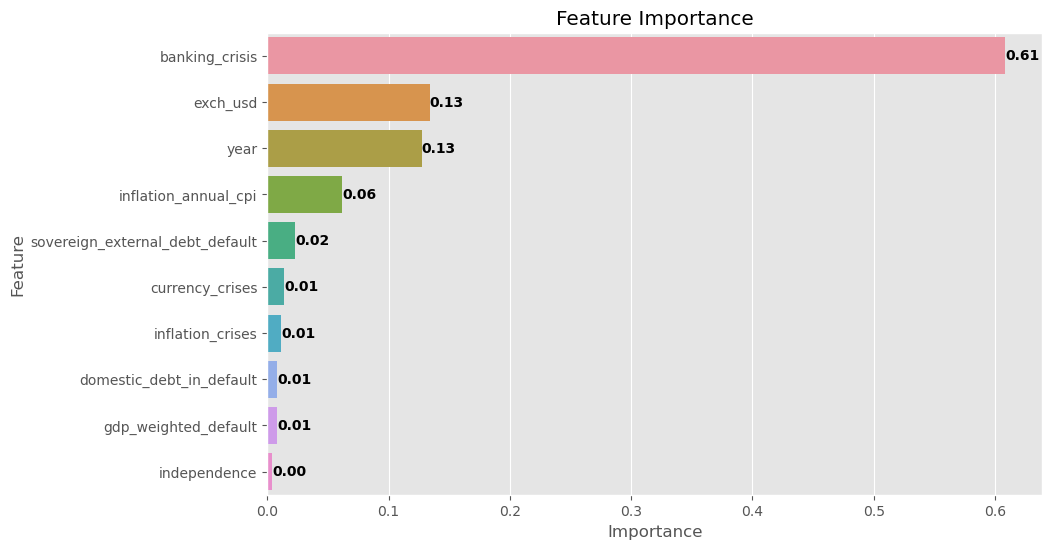

In [53]:
# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Annotate the bars with the importance values
for i, v in enumerate(feature_importance_df['Importance']):
    ax.text(v, i, f'{v:.2f}', color='black', va='center', fontsize=10, fontweight='bold')

plt.show()

# A Bit of Features Selection 
We will use the following features;Banking_crisis , Exch_usd, Year,  Inflation_annual_cpi, and Sovereign_external_debt_default to retrain the Decision Tree model.


In [56]:
# split into training and validation set using 30-70 split ratio
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.3)
X_train2 = X_train[['banking_crisis', 'exch_usd', 'year', 'inflation_annual_cpi', 'sovereign_external_debt_default']]
X_valid2 = X_valid[['banking_crisis', 'exch_usd', 'year', 'inflation_annual_cpi', 'sovereign_external_debt_default']]

In [57]:
# Since Decision Tree model is the best performing model

# fit the model on the new training set
dt_model.fit(X_train2, y_train)

# predit on the new testing set
y_valid2_pred = dt_model.predict(X_valid2)

In [58]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy:.2f}')

Accuracy Score: 0.99


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_valid2_pred, y_valid)
print(f'Precision Score: {precision:.2f}')

# Calculate recall
recall = recall_score(y_valid2_pred, y_valid)
print(f'Recall Score: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_valid2_pred, y_valid)
print(f'F1-score: {f1:.2f}')


Accuracy Score: 0.99
Precision Score: 0.98
Recall Score: 1.00
F1-score: 0.99
